In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-3, 3)

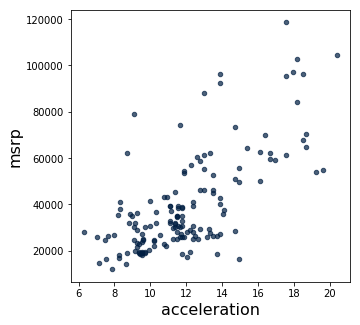

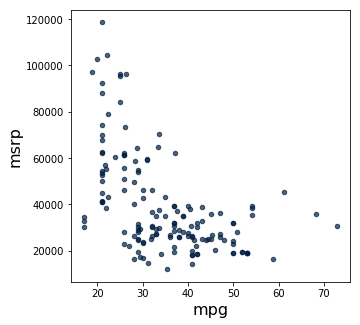

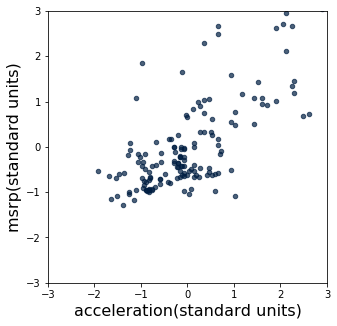

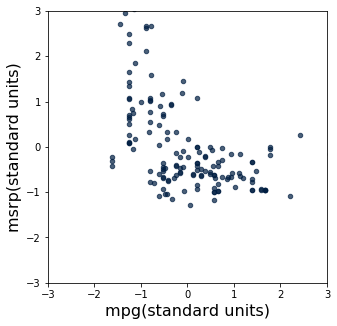

In [2]:
# 15.1 Correlation

hybrid = Table.read_table('hybrid.csv')
hybrid
hybrid.scatter('acceleration', 'msrp')
hybrid.scatter('mpg', 'msrp')

def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)

Table().with_columns(
    'acceleration(standard units)', standard_units(hybrid.column('acceleration')),
    'msrp(standard units)', standard_units(hybrid.column('msrp')),
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

Table().with_columns(
    'mpg(standard units)', standard_units(hybrid.column('mpg')),
    'msrp(standard units)', standard_units(hybrid.column('msrp')),
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

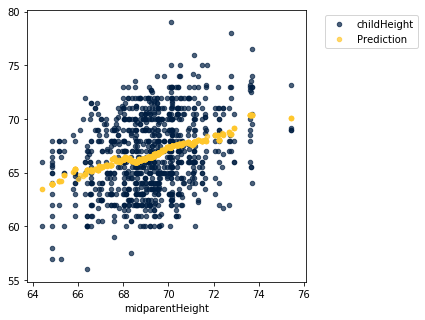

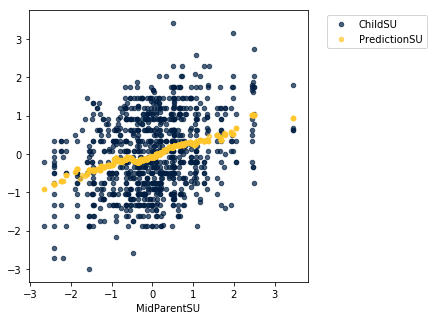

In [12]:
# 15.2 The Regression Line
galton = Table.read_table('galton.csv')
heights = galton.select('midparentHeight', 'childHeight')
heights

def predict_child(mpht):
    close_points = heights.where('midparentHeight', are.between(mpht-0.5, mpht+0.5))
    return close_points.column('childHeight').mean()

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'midparentHeight')
)
heights_with_predictions.scatter('midparentHeight')

def standard_units(a):
    return (a - np.mean(a)) / np.std(a)

heights_su = Table().with_columns(
    'MidParentSU', standard_units(heights.column('midparentHeight')),
    'ChildSU', standard_units(heights.column('childHeight'))
)

def predict_child_su(mpht_su):
    close = 0.5 / np.std(heights.column('midparentHeight'))
    close_points = heights_su.where('MidParentSU', are.between(mpht_su-close, mpht_su+close))
    return close_points.column('ChildSU').mean()

heights_with_predictions_su = heights_su.with_column(
    'PredictionSU', heights_su.apply(predict_child_su, 'MidParentSU')
)
heights_with_predictions_su.scatter('MidParentSU')

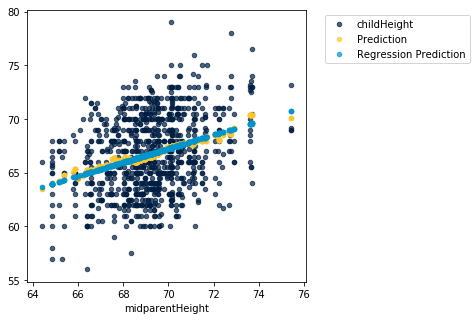

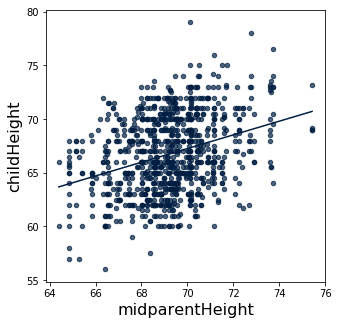

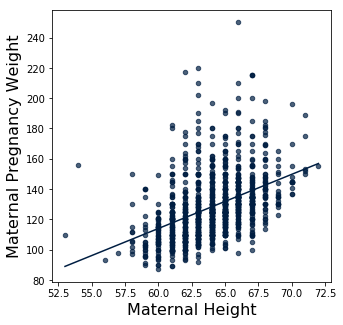

In [37]:
# 15.2
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    return correlation(t, x, y) * np.mean(np.std(t.column(y))/np.std(t.column(x)))

def intercept(t, x, y):
    return np.mean(t.column(y) - slope(t, x, y) * t.column(x))

correlation(heights, 'midparentHeight', 'childHeight')
galton_slope = slope(heights, 'midparentHeight', 'childHeight')
galton_intercept = intercept(heights, 'midparentHeight', 'childHeight')
galton_intercept + galton_slope * 70.48
#heights_with_predictions.where('midparentHeight', 70.48).show(3)
heights_with_predictions = heights_with_predictions.with_columns(
    'Regression Prediction', galton_intercept + galton_slope * heights_with_predictions.column('midparentHeight')
)
heights_with_predictions
heights_with_predictions.scatter('midparentHeight')
heights.scatter('midparentHeight', fit_line=True)

baby = Table.read_table('baby.csv')
baby
baby.scatter('Maternal Height', 'Maternal Pregnancy Weight', fit_line=True)
slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')

def fit(t, x, y):
    line_slope = slope(t, x, y)
    line_intercept = intercept(t, x, y)
    return line_slope * t.column(x) + line_intercept

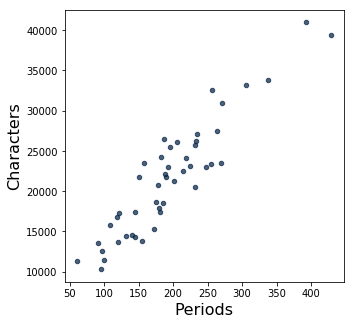

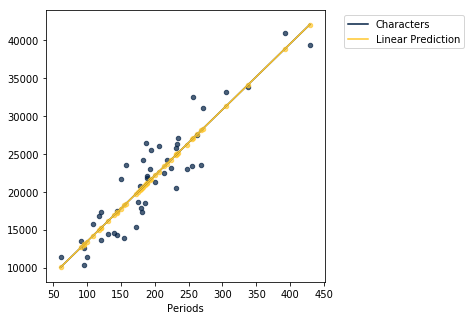

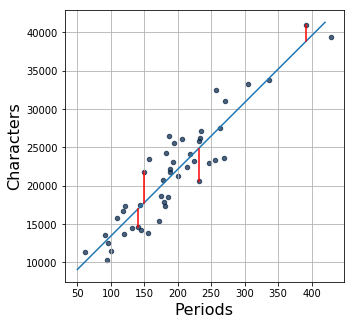

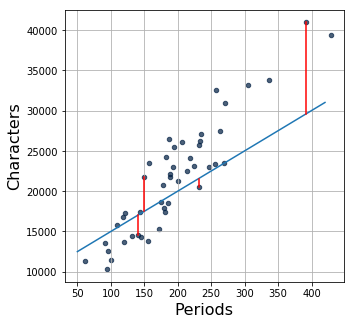

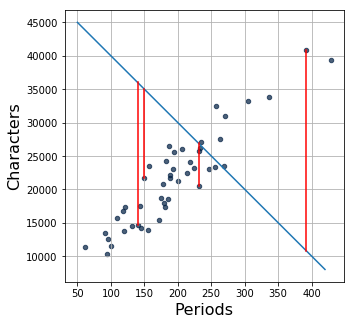

In [73]:
# 15.3 The Method of Least Squares
little_women = Table().read_table('little_women.csv')
little_women = little_women.select('Periods', 'Characters')
little_women.scatter('Periods', 'Characters')
correlation(little_women, 'Periods', 'Characters')
little_women = little_women.with_column(
    'Linear Prediction', fit(little_women, 'Periods', 'Characters')
)
little_women.scatter('Periods', fit_line=True)

actual = little_women.column('Characters')
predicted = little_women.column('Linear Prediction')
errors = actual - predicted
little_women.with_column('Error', errors)

def lw_errors(lw_reg_slope, lw_reg_intercept):
    little_women.scatter('Periods', 'Characters')
    plt.grid()
    
    # Regression Line
    x1 = 50
    x2 = 420
    y1 = lw_reg_slope * x1 + lw_reg_intercept
    y2 = lw_reg_slope * x2 + lw_reg_intercept
    plt.plot([x1, x2], [y1, y2])
    
    #Error Line
    x1 = 140
    x2 = x1
    y1 = 14622
    y2 = lw_reg_slope * x2 + lw_reg_intercept
    plt.plot([x1, x2], [y1, y2], color='red')
    
    x1 = 150
    x2 = x1
    y1 = 21739
    y2 = lw_reg_slope * x2 + lw_reg_intercept
    plt.plot([x1, x2], [y1, y2], color='red')
    
    x1 = 231
    x2 = x1
    y1 = 20558
    y2 = lw_reg_slope * x2 + lw_reg_intercept
    plt.plot([x1, x2], [y1, y2], color='red')
    
    x1 = 392
    x2 = x1
    y1 = 40935
    y2 = lw_reg_slope * x2 + lw_reg_intercept
    plt.plot([x1, x2], [y1, y2], color='red')

#little_women.sort('Periods', descending=True).show()
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')
lw_errors(lw_reg_slope, lw_reg_intercept)
lw_errors(50, 10000)
lw_errors(-100, 50000)

Root mean squared error: 4322.167831766537
Root mean squared error: 16710.11983735375
Root mean squared error: 2715.5391063834586
Root mean squared error: 2701.690785311856


array([  86.97784117, 4744.78484535])

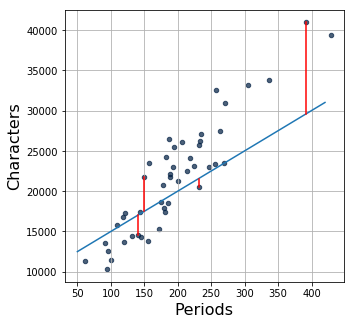

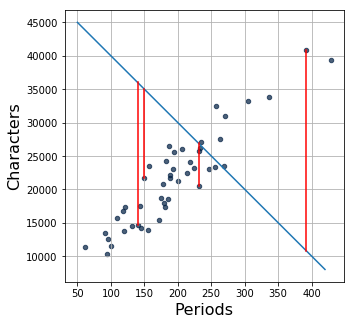

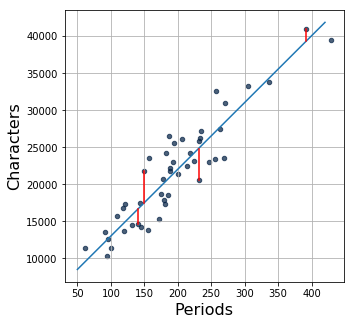

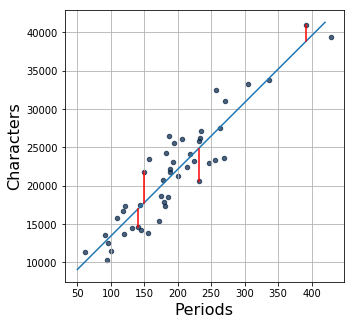

In [93]:
# 15.3 RMSE
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    y_pred = slope * x + intercept
    rmse = np.mean((y - y_pred) ** 2) ** 0.5
    print("Root mean squared error:", rmse)

lw_rmse(50, 10000)
lw_rmse(-100, 50000)
lw_rmse(90, 4000)
lw_rmse(lw_reg_slope, lw_reg_intercept)

def lw_mse(slope, intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    y_pred = slope * x + intercept
    return np.mean((y - y_pred) ** 2)

minimize(lw_mse)

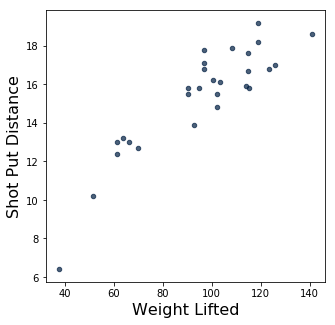

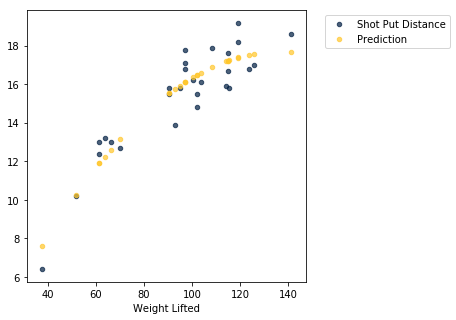

In [100]:
# 15.4 Least Squares Regression

shotput = Table().read_table('shotput.csv')
shotput.scatter('Weight Lifted')

def shotput_quadratic_mse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    y_pred = a*(x**2) + b*x + c
    mse = np.mean((y - y_pred) ** 2)
    return mse

a, b, c = minimize(shotput_quadratic_mse)
shotput = shotput.with_column(
    'Prediction', a*(shotput.column('Weight Lifted') ** 2) + b*shotput.column('Weight Lifted') + c
)
shotput.scatter('Weight Lifted')